In [1]:
import numpy as np
import torchvision
import torch
import matplotlib.pyplot as plt
import matplotlib
import mnist_autoencoder as model

In [2]:
# loading the weights for the model and loading the test images

net = model.Net()

#train_imgs, train_labels = iter(model.trainloader).next()
test_imgs, _ = iter(model.testloader).next()

net.load_state_dict(torch.load('data/encoder_net.pth'))

<All keys matched successfully>

In [3]:
# input is a tensor of images of shape [<batch size>, 784]

def show_imgs(img_batch_1, img_batch_2=None):
    plt.clf()
    imgs = torchvision.utils.make_grid(img_batch_1)
    trans = np.transpose(imgs.numpy(), (1,2,0))
    plt.figure(figsize=(18,16), dpi=100)
    
    if(img_batch_2 != None):
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(trans)
        imgs2 = torchvision.utils.make_grid(img_batch_2)
        trans2 = np.transpose(imgs2.numpy(), (1,2,0))
        plt.subplot(1, 2, 2)
        plt.title("Guess")
        plt.imshow(trans2)
    else:
        plt.imshow(trans)

    plt.show()

In [4]:
testiter = iter(model.testloader)
i = 0

Batch #3


<Figure size 432x288 with 0 Axes>

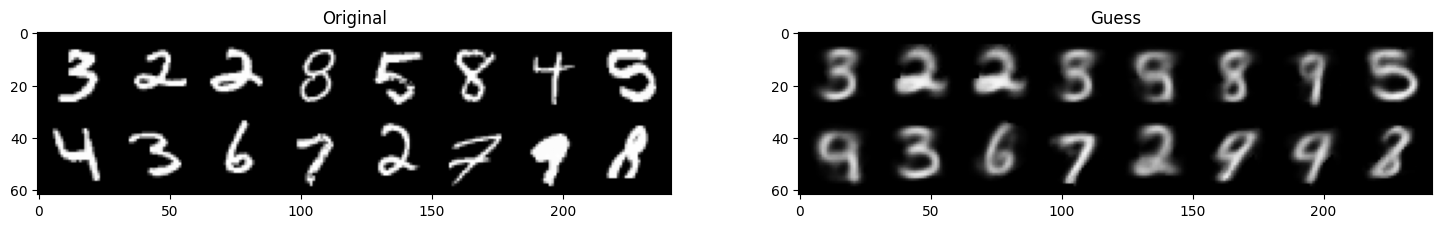

In [7]:
# refresh cell to get next batch (ctrl + enter)

test_imgs, _ = testiter.next()
i += 1

print("Batch #" + str(i))
show_imgs(test_imgs, net(test_imgs.view(model.BATCH_SIZE,784)).view(model.BATCH_SIZE,1,28,28).data)